In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

In [5]:
x_train = np.load('dataset/x_train.npy') 
y_train = np.load('dataset/y_train.npy')
x_val = np.load('dataset/x_val.npy')
y_val = np.load('dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)


In [3]:
inputs = Input(shape=(256, 256, 1))

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)      

In [10]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
])

Epoch 1/100
8/8 [==============================] - 54s 7s/step - loss: 0.3331 - acc: 0.8543 - mse: 0.1048 - val_loss: 0.3503 - val_acc: 0.7617 - val_mse: 0.1169
Epoch 2/100
8/8 [==============================] - 47s 6s/step - loss: 0.2912 - acc: 0.8540 - mse: 0.0930 - val_loss: 0.2956 - val_acc: 0.8431 - val_mse: 0.0920
Epoch 3/100
8/8 [==============================] - 47s 6s/step - loss: 0.3398 - acc: 0.8304 - mse: 0.1078 - val_loss: 0.4003 - val_acc: 0.7890 - val_mse: 0.1361
Epoch 4/100
8/8 [==============================] - 47s 6s/step - loss: 0.2690 - acc: 0.8752 - mse: 0.0843 - val_loss: 0.2243 - val_acc: 0.9289 - val_mse: 0.0620
Epoch 5/100
8/8 [==============================] - 47s 6s/step - loss: 0.1939 - acc: 0.9289 - mse: 0.0546 - val_loss: 0.3464 - val_acc: 0.8520 - val_mse: 0.1075
Epoch 6/100
8/8 [==============================] - 47s 6s/step - loss: 0.2550 - acc: 0.8801 - mse: 0.0804 - val_loss: 0.3023 - val_acc: 0.8215 - val_mse: 0.1006
Epoch 7/100
8/8 [=================

8/8 [==============================] - 47s 6s/step - loss: 0.0463 - acc: 0.9818 - mse: 0.0102 - val_loss: 0.1244 - val_acc: 0.9676 - val_mse: 0.0233
Epoch 50/100
8/8 [==============================] - 47s 6s/step - loss: 0.0463 - acc: 0.9818 - mse: 0.0102 - val_loss: 0.1244 - val_acc: 0.9678 - val_mse: 0.0232
Epoch 51/100
8/8 [==============================] - 48s 6s/step - loss: 0.0462 - acc: 0.9818 - mse: 0.0101 - val_loss: 0.1245 - val_acc: 0.9678 - val_mse: 0.0232
Epoch 52/100
8/8 [==============================] - 47s 6s/step - loss: 0.0461 - acc: 0.9819 - mse: 0.0101 - val_loss: 0.1243 - val_acc: 0.9678 - val_mse: 0.0233
Epoch 53/100
8/8 [==============================] - 48s 6s/step - loss: 0.0463 - acc: 0.9818 - mse: 0.0102 - val_loss: 0.1241 - val_acc: 0.9676 - val_mse: 0.0233
Epoch 54/100
8/8 [==============================] - ETA: 0s - loss: 0.0459 - acc: 0.9819 - mse: 0.0101
Epoch 00054: ReduceLROnPlateau reducing learning rate to 1e-05.
8/8 [==============================]

Epoch 99/100
8/8 [==============================] - 47s 6s/step - loss: 0.0454 - acc: 0.9821 - mse: 0.0099 - val_loss: 0.1244 - val_acc: 0.9680 - val_mse: 0.0231
Epoch 100/100
8/8 [==============================] - 47s 6s/step - loss: 0.0453 - acc: 0.9821 - mse: 0.0099 - val_loss: 0.1244 - val_acc: 0.9680 - val_mse: 0.0231


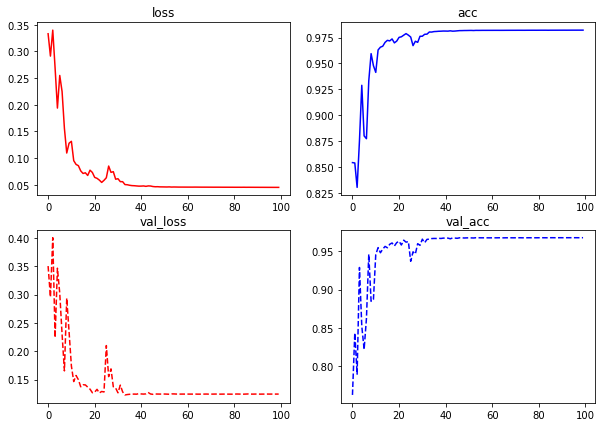

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

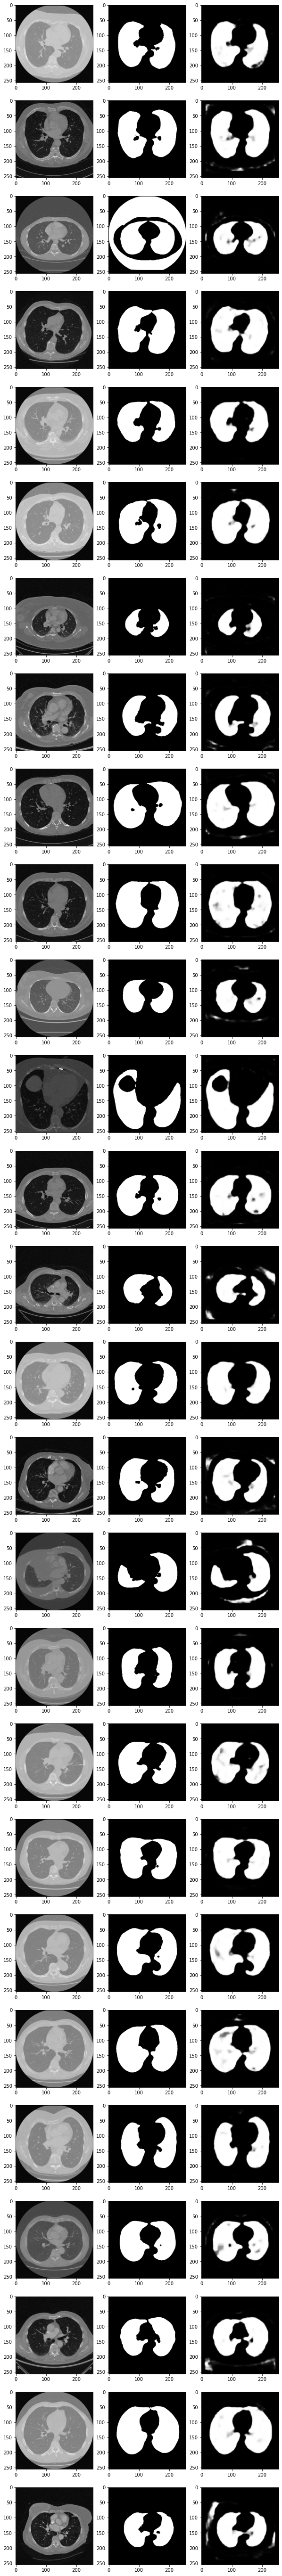

In [12]:
preds = model.predict(x_val)

fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')